In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import random
import copy

In [400]:
def plot_solution(solution):
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, 8))
    ax.set_ylim((0, 8))

    count = 0
    for queen in solution:
        ax.add_patch(plt.Rectangle((count, queen), 1, 1))
        count += 1
    plt.grid()
    plt.show(fig)

In [517]:
def getWeakpoints(x, y, N):

    weakpoints = []
    
    weakpoints += list(zip(range(0, x), [y]*x))                         # Left
    weakpoints += list(zip(range(x+1, N), [y]*(N-x)))                   # Right
    weakpoints += list(zip([x]*y, range(0, y)))                         # Down
    weakpoints += list(zip([x]*(N-y), range(y+1, N)))                   # Up

    
    weakpoints += list(zip(range(x-1, -1, -1), range(y-1, -1, -1)))     # Down Left
    weakpoints += list(zip(range(x+1, N), range(y+1, N)))               # Up Right
    weakpoints += list(zip(range(x-1, -1, -1), range(y+1, N)))          # Down Right
    weakpoints += list(zip(range(x+1, N), range(y-1, -1, -1)))          # Up Left

    return weakpoints

In [446]:
def isSafe(board, row, col, N=8):
    queens = list(zip(range(N), board))
    weakpoints = getWeakpoints(row, col, N)
    
    for queen in queens:
        if queen in weakpoints:
            return False
  
    return True

In [447]:
def timesHitted(board, row, col, N=8):
    queens = list(zip(range(N), board))

    miniScore = 0
    weakpoints = getWeakpoints(row, col, N)
    for queen in queens:
        if queen in weakpoints:
            miniScore += 1
  
    return miniScore

In [533]:
def objectiveFunction(solution):
    scoreSum = 0
    for i, queen in enumerate(solution):
        #scoreSum += timesHitted(solution, i, queen)
        if isSafe(solution, i, queen):
            #print("Safe:", i, queen)
            scoreSum += 1
    return scoreSum

In [534]:
def GetRandomChromosome(n):
    chromosome = np.random.permutation(np.arange(n))
    score = objectiveFunction(chromosome)
    return [chromosome, score]

In [535]:
def getPopulation(n = 1):
    return [GetRandomChromosome(8) for _ in range(n)] # O(n)

Score 2
[0 2 3 4 5 6 7 1]


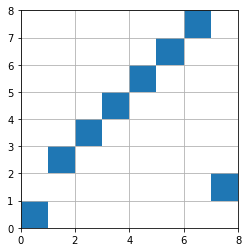

In [536]:
x = GetRandomChromosome(8)
print("Score", x[1])
print(x[0])
plot_solution(x[0])

In [537]:
def TournamentSelection(population, k=2):
    community = random.sample(population, k)
    localElite = community[0]
    
    for chromosome in community:
        if chromosome[1] >= localElite[1]:
            localElite = chromosome
            
    return localElite

In [538]:
def getElite(A, B):
    if A is None: return B
    if B is None: return A
    
    if A[1] >= B[1]:
        return A
    else:
        return B

In [539]:
def pointCrossover(A, B, reproductionProbability, N):

    if random.random() <= reproductionProbability:
        
        crosspoint = random.randint(0, N-1)
        C = np.concatenate((A[0][:crosspoint], B[0][crosspoint:]), axis=0)
        score = objectiveFunction(C)
        return [C, score]
        
    else:
        return copy.deepcopy(A)

In [546]:
def mutation(C, mutationProbability, N):
    if random.random() <= mutationProbability:
        mutatedGeneIdx = random.randint(0, N-1)
        C[0][mutatedGeneIdx] = random.randint(0, N-1)
        C[1] = objectiveFunction(C[0])

In [549]:
population = getPopulation(100)
A = TournamentSelection(population)
B = TournamentSelection(population)
print(A)
print(B)

C = pointCrossover(A, B, 0.8, 8)
print(C)

mutation(C, 1, 8)
print(C)



[array([5, 2, 0, 3, 4, 6, 7, 1]), 2]
[array([7, 0, 4, 6, 3, 2, 5, 1]), 3]
[array([5, 2, 0, 6, 3, 2, 5, 1]), 3]
[array([5, 2, 0, 6, 3, 2, 7, 1]), 4]


In [550]:
def geneticAlgorithm(noQueens, populationSize, generations, reproductionProbability, mutationProbability):
    eliteIndividual = None

    fatherPopulation = getPopulation(populationSize) # First Gen
    sonPopulation = []

    actualGeneration = 0

    while actualGeneration < generations: # OR we haven't found a good solution
        
        for _ in range(populationSize):
            G11 = TournamentSelection(fatherPopulation)
            G12 = TournamentSelection(fatherPopulation)

            G21 = pointCrossover(G11, G12, reproductionProbability, noQueens)
            mutation(G21, mutationProbability, noQueens)

            sonPopulation.append(G21)
            
            eliteIndividual = getElite(G21, eliteIndividual)
        
        fatherPopulation = sonPopulation
        sonPopulation = []

        actualGeneration += 1
    
    return eliteIndividual

In [551]:
noQueens = 8
populationSize = 50
generations = 100
reproductionProbability = 0.1
mutationProbability = 0.1

result = geneticAlgorithm(noQueens, populationSize, generations, reproductionProbability, mutationProbability)

Score 8


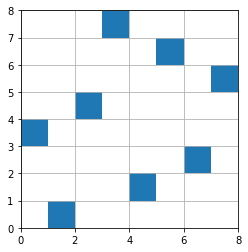

In [552]:
print('Score: ', result[1], 'Queens')
plot_solution(result[0])

In [577]:
noQueens = 8
populationSize = 100
generations = 100
reproductionProbability = 0.8
mutationProbability = 0.2

result = geneticAlgorithm(noQueens, populationSize, generations, reproductionProbability, mutationProbability)

Score:  8 Queens


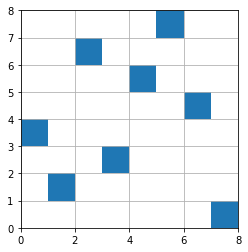

In [578]:
print('Score: ', result[1], 'Queens')
plot_solution(result[0])